In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
## Reading CSV dataset
df = pd.read_csv('BA_reviews.csv')
df

,reviews
0,✅ Trip Verified | Booked a BA holiday to Marr...
1,✅ Trip Verified | Extremely sub-par service. H...
2,✅ Trip Verified | I virtually gave up on Brit...
3,✅ Trip Verified | I was pleasantly surprised ...
4,"✅ Trip Verified | British Airways is late, th..."
...,...
3421,Flight from Heathrow to Toronto. Booked emerge...
3422,LHR to HAM. Purser addresses all club passenge...
3423,My son who had worked for British Airways urge...
3424,London City-New York JFK via Shannon on A318 b...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3426 non-null   object
dtypes: object(1)
memory usage: 26.9+ KB


In [4]:
## Counting Duplicated Data
df.duplicated().sum()

18

In [5]:
## Printing Rows with Duplicated Values
duplicates = df[df.duplicated()]
duplicates

,reviews
2282,British Airways from Tampa to Gatwick on Boein...
2284,London Heathrow to Miami on one of British Air...
2701,BA seem to be trying harder ground customer se...
2904,Recently completed a round-trip LGW-Barcelona....
2905,LHR-HKG-LHR in First. A brief trip to celebrat...
2906,BA179 Jan 6 2015 LHR-JFK. First. T5 is great f...
2907,London-Gatwick to Venice on 30 December 2014 e...
2908,We flew from Gatwick to Jamaica in November. C...
2909,Heathrow to Newark on 787 aircraft. Plane clea...
2910,Just back from a fantastic 2.5 week trip to Th...


In [6]:
## Dropping Duplicate Values
df = df.drop_duplicates()
df

,reviews
0,✅ Trip Verified | Booked a BA holiday to Marr...
1,✅ Trip Verified | Extremely sub-par service. H...
2,✅ Trip Verified | I virtually gave up on Brit...
3,✅ Trip Verified | I was pleasantly surprised ...
4,"✅ Trip Verified | British Airways is late, th..."
...,...
3421,Flight from Heathrow to Toronto. Booked emerge...
3422,LHR to HAM. Purser addresses all club passenge...
3423,My son who had worked for British Airways urge...
3424,London City-New York JFK via Shannon on A318 b...


In [7]:
## Cleaning Text
import re 
def review_cleaner(reviews):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    reviews = re.sub(emoj, '', reviews) # remove emojis
    reviews = re.sub('Trip Verified', '', reviews) # remove Trip Verified
    reviews = re.sub('Not Verified |  ', '', reviews) # remove Not Verified
    reviews = reviews.replace('|', '') # Remove Vertical Bar
    reviews = reviews.lower()
    return reviews



df['clean_reviews'] = df['reviews'].apply(review_cleaner)
df

/var/folders/87/jh63yc3x2tgf72ln53c1n40c0000gn/T/ipykernel_9043/2569450129.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_reviews'] = df['reviews'].apply(review_cleaner)


,reviews,clean_reviews
0,✅ Trip Verified | Booked a BA holiday to Marr...,"booked a ba holiday to marrakech, after postin..."
1,✅ Trip Verified | Extremely sub-par service. H...,extremely sub-par service. highlights: no onl...
2,✅ Trip Verified | I virtually gave up on Brit...,i virtually gave up on british airways about t...
3,✅ Trip Verified | I was pleasantly surprised ...,i was pleasantly surprised that the airline co...
4,"✅ Trip Verified | British Airways is late, th...","british airways is late, their website is atro..."
...,...,...
3421,Flight from Heathrow to Toronto. Booked emerge...,flight from heathrow to toronto. booked emerge...
3422,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...
3423,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3424,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...


In [8]:
df.clean_reviews[0]

'booked a ba holiday to marrakech, after posting a negative review regarding my double tier points credit, i can now confirm that the points have been credited. it took a while but ba did eventually make good on their promise, thank you. based on things now being resolved i have travelled on ba since and i am booked to travel to south africa in first class on 2nd january, looking forward to the new ba concorde lounge. keep it up ba, loyalty is indeed a 2way street.'

In [9]:
df.clean_reviews[4]

"british airways is late, their website is atrocious, and they wouldn't let me check-in until 24 hours before the flight. i have been trying for 6 hours to check in through their website, and/or find a real person to speak with. customer service had such a thick accent i didn't think they were speaking english. "

In [10]:
df.clean_reviews[256]

' ba encourage you to download verifly to speed up your check-in, this is absolutely rubbish as the desk staff don’t seem to want this, they want to see the actual forms tests etc! this wasted about 40 minutes and is pointless. the return flight again had no access to the club lounge, you pay for extras such as this as part of the business class ticket price and should by now be made available again (last 2 flight not available at nce but this is more a part of the covid experience). on board staff were good although one did joke to another welcome to ryanair. on board food was very good for a short haul flight.'

In [11]:
df.to_csv('BA_reviews_updated', index=False)

# Vader Sentiment Scoring

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
original = df.reviews[0]
print(original)
example = df.clean_reviews[0]
print(example)
print(sia.polarity_scores(example))

✅ Trip Verified |  Booked a BA holiday to Marrakech, after posting a negative review regarding my double tier points credit, I can now confirm that the points have been credited. It took a while but BA did eventually make good on their promise, thank you. Based on things now being resolved I have travelled on BA since and I am booked to travel to South Africa in First class on 2nd January, looking forward to the new BA Concorde lounge. Keep it up BA, loyalty is indeed a 2way street.
booked a ba holiday to marrakech, after posting a negative review regarding my double tier points credit, i can now confirm that the points have been credited. it took a while but ba did eventually make good on their promise, thank you. based on things now being resolved i have travelled on ba since and i am booked to travel to south africa in first class on 2nd january, looking forward to the new ba concorde lounge. keep it up ba, loyalty is indeed a 2way street.
{'neg': 0.025, 'neu': 0.743, 'pos': 0.233, 

In [13]:
score_function = lambda title: sia.polarity_scores(title)['compound']
df['compound_score'] = df['clean_reviews'].apply(score_function)
df

/var/folders/87/jh63yc3x2tgf72ln53c1n40c0000gn/T/ipykernel_9043/2320401152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_score'] = df['clean_reviews'].apply(score_function)


,reviews,clean_reviews,compound_score
0,✅ Trip Verified | Booked a BA holiday to Marr...,"booked a ba holiday to marrakech, after postin...",0.9578
1,✅ Trip Verified | Extremely sub-par service. H...,extremely sub-par service. highlights: no onl...,-0.4576
2,✅ Trip Verified | I virtually gave up on Brit...,i virtually gave up on british airways about t...,0.9799
3,✅ Trip Verified | I was pleasantly surprised ...,i was pleasantly surprised that the airline co...,0.8603
4,"✅ Trip Verified | British Airways is late, th...","british airways is late, their website is atro...",0.0000
...,...,...,...
3421,Flight from Heathrow to Toronto. Booked emerge...,flight from heathrow to toronto. booked emerge...,-0.6562
3422,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,0.8720
3423,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,0.4516
3424,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,0.9148


In [14]:
print(df.reviews[4])
print(df.compound_score[4])

✅ Trip Verified |  British Airways is late, their website is atrocious, and they wouldn't let me check-in until 24 hours before the flight. I have been trying for 6 hours to check in through their website, and/or find a real person to speak with. Customer service had such a thick accent I didn't think they were speaking English. 
0.0


In [15]:
print(df.reviews[256])
print(df.compound_score[256])

✅ Trip Verified | BA encourage you to download verifly to speed up your check-in, this is absolutely rubbish as the desk staff don’t seem to want this, they want to see the actual forms tests etc! This wasted about 40 minutes and is pointless. The return flight again had no access to the club lounge, you pay for extras such as this as part of the business class ticket price and should by now be made available again (last 2 flight not available at NCE but this is more a part of the Covid experience). On board staff were good although one did joke to another welcome to Ryanair. On board food was very good for a short haul flight.
0.9333


In [16]:
print(df.reviews[495])
print(df.compound_score[495])

✅ Trip Verified |  London to Gothenburg. BA are getting a lot of bad press - deservedly so at present with strikes, IT glitches, baggage problems. However extreme cases will always be highlighted. Two recent flights on BA, and very happy with them. Flight to Gothenburg on A319-100, pushed back 25m late due to a potential technical issue, soon resolved and arrived at GOT only 15m behind schedule. Good crew and the Safety Announcement video was a hoot. Return to LHR on A320-232. On time departure and early arrival at T5. Again good crew. Will be flying with BA again in December (strikes permitting). Still recommended by me as the National Carrier.
0.7501


In [17]:
print(df.reviews[508])
print(df.compound_score[508])

✅ Trip Verified |  I purchased a ticket for Dublin to Mauritius on British Airways for 23 Feb 2019. On the day of travel, a few hours before the departure time, I realized that I would not be able to make it and so I got in touch with British Airways on Twitter advising them of my cancellation. When I arrived home, I asked them to officially cancel my ticket and issue me a refund. I understood that my ticket was a non-refundable one, but it says on the ticket that surcharges, taxes and airport fees would be refundable which should have amounted to at least 250 euro. However, all the airline  refunded me was a pitiful 50 euro. I have been trying to speak to British Airways on Twitter many times over the past few months, and they never responded positively, only insisting that they were doing the right thing and that their position would not change. British Airways is being dishonest and should be avoided.
-0.956


In [18]:
## Sentiment Column based on compound_score value
def getSentiment(score):
    if score < 0:
        return 'Neg'
    else:
        return 'Pos'

df['sentiment'] = df['compound_score'].apply(getSentiment)
df

/var/folders/87/jh63yc3x2tgf72ln53c1n40c0000gn/T/ipykernel_9043/888554679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['compound_score'].apply(getSentiment)


,reviews,clean_reviews,compound_score,sentiment
0,✅ Trip Verified | Booked a BA holiday to Marr...,"booked a ba holiday to marrakech, after postin...",0.9578,Pos
1,✅ Trip Verified | Extremely sub-par service. H...,extremely sub-par service. highlights: no onl...,-0.4576,Neg
2,✅ Trip Verified | I virtually gave up on Brit...,i virtually gave up on british airways about t...,0.9799,Pos
3,✅ Trip Verified | I was pleasantly surprised ...,i was pleasantly surprised that the airline co...,0.8603,Pos
4,"✅ Trip Verified | British Airways is late, th...","british airways is late, their website is atro...",0.0000,Pos
...,...,...,...,...
3421,Flight from Heathrow to Toronto. Booked emerge...,flight from heathrow to toronto. booked emerge...,-0.6562,Neg
3422,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,0.8720,Pos
3423,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,0.4516,Pos
3424,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,0.9148,Pos


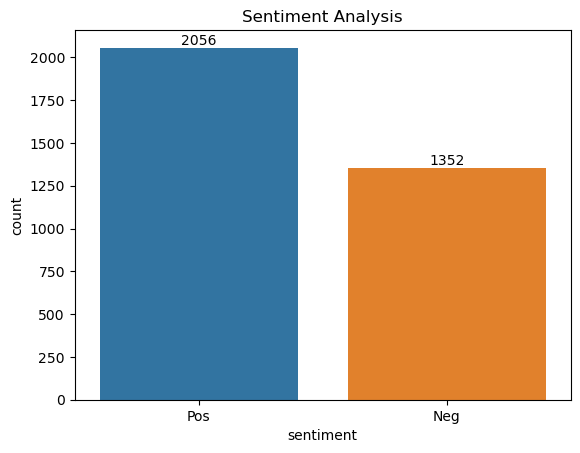

In [19]:
import seaborn as sns
ax = sns.countplot(df, x='sentiment')
ax.set_title('Sentiment Analysis')
for container in ax.containers:
    ax.bar_label(container)

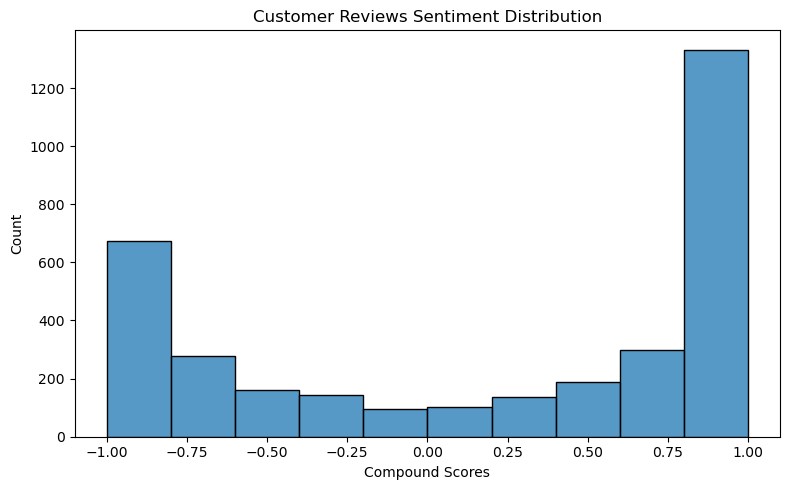

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df, x='compound_score', bins=10, binrange=(-1, 1))
plt.title("Customer Reviews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.tight_layout()